In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch.univariate import GARCH, ConstantMean, SkewStudent, Normal
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
import seaborn as sns

ERROR! Session/line number was not unique in database. History logging moved to new session 984


In [95]:
def seed_dist(i):
    return [i,i+1,i+2,i+3]

In [96]:
def acf_garch(a,b,h):
    # h>=1
    # a: alpha
    # b: beta
    p_1 = a*(1-b*(a+b))/(1-(a+b)**2+a**2) 
    p_h = p_1 *(a+b)**(h-1)
    return p_h

In [97]:
def sim_garch(n,m,a,b,omega):
    # n: numero de series simuladas
    # m: datos de la serie a simular
    # omega : omega
    sim_mod = arch_model(None, p=1, o=0, q=1)
    params = {"mu":0,"omega": omega,"alpha[1]":a,"beta[1]":b}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        seedd = seed_dist(i)
        rs = np.random.RandomState(seedd)
        sim_mod.distribution = Normal(seed=rs)
        sim_data = sim_mod.simulate(param, m) #1000000
        datos_simulados.append(sim_data["data"])
    
    
    acfs = []
    for i in range(n):
        acfs.append(acf(np.square(datos_simulados[i]),nlags = 20))
    
    df = pd.DataFrame(acfs, columns=np.arange(0, 21))
    acf_mean = df.mean()
    acf_teory_1 = []
    acf1 = acf_mean[1:20]
    for i in range(1,20):
        acf_teory_1.append(acf_garch(a,b,i))
    
    return acf1,acf_teory_1

### m sera la cantidad de datos por serie y n el numero de trayectorias

In [98]:
x = np.arange(1,20)
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = 0.1

In [99]:
acf1 =[]
acf2 = []
acf3 = []
acf4 = []

acf1t =[]
acf2t = []
acf3t = []
acf4t = []

## n = 100 y m = 500 

In [100]:
acf_total = []
acf_t_total = []

In [101]:
acf_m = []
acf_t = []
n=100
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [102]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [103]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

# n = 1000 y m=500

In [104]:
acf_m = []
acf_t = []
n=1000
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


In [105]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [106]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

## n = 10000 y m=500

In [107]:
acf_m = []
acf_t = []
n=10000
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [108]:
distancias_acf3 = []
for i in range(len(alpha)):
    distancias_acf3.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [109]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen = pd.DataFrame(dist,columns = names)
resumen.index = ["n=100","n=1000","n=10000"]

In [110]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [111]:
nn = [100,1000,10000]

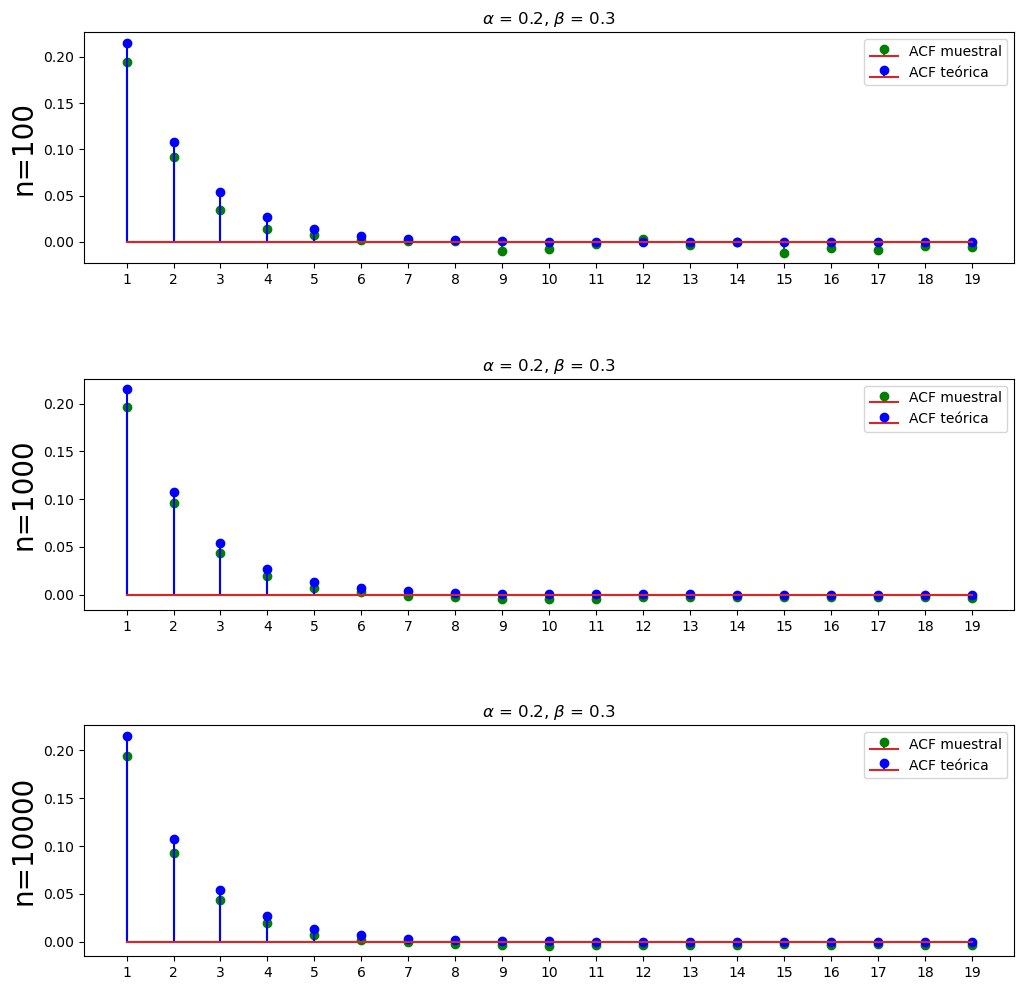

In [112]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf1[i],linefmt='green', label='ACF muestral')
    ax.stem(acf1t[i],linefmt='blue', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    i=i+1

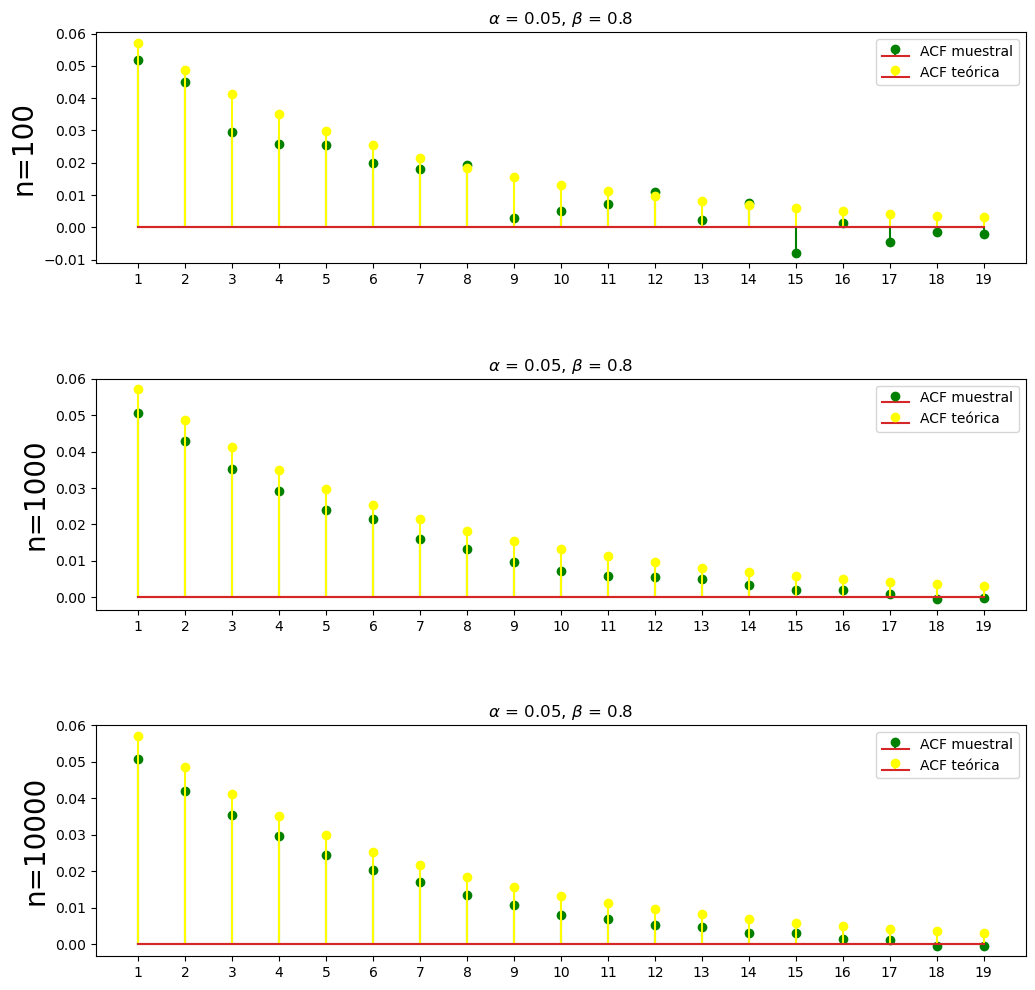

In [55]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf2[i],linefmt='green', label='ACF muestral')
    ax.stem(acf2t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

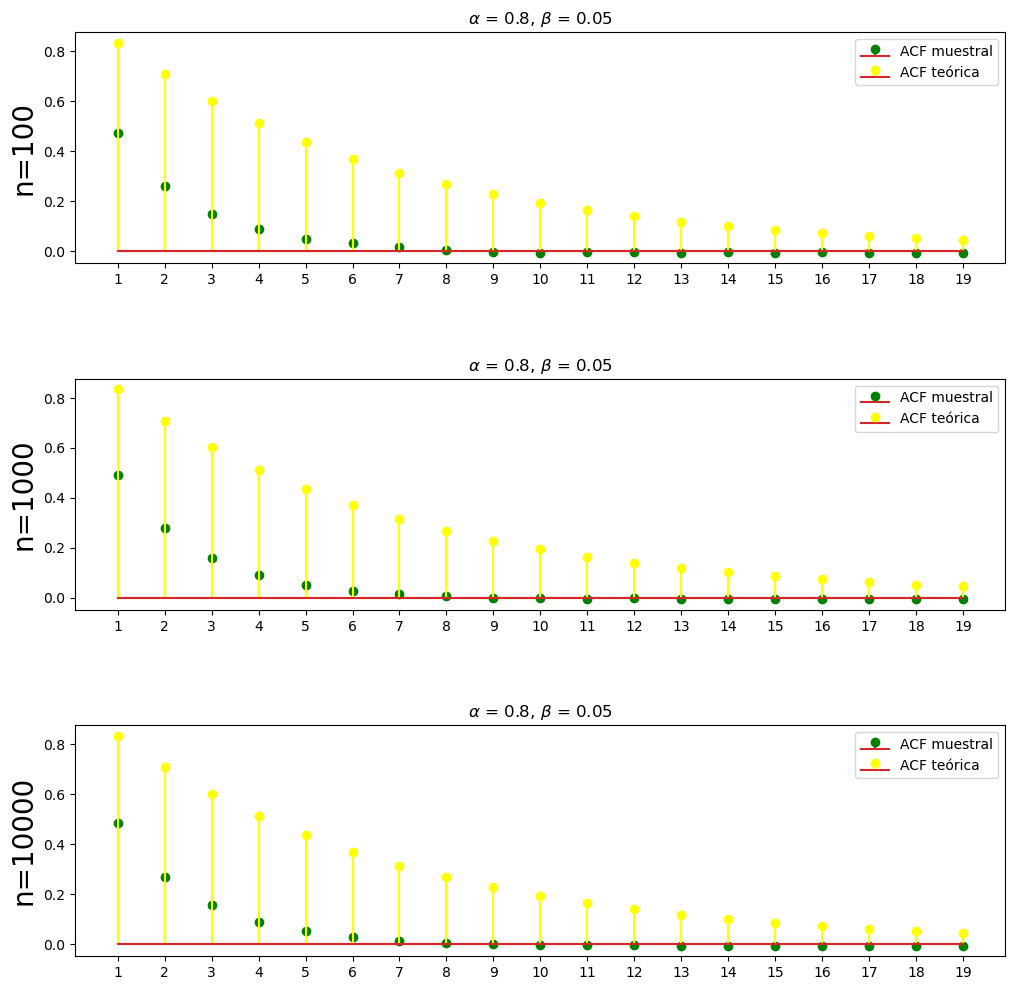

In [56]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf3[i],linefmt='green', label='ACF muestral')
    ax.stem(acf3t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[2]}, $\beta$ = {beta[2]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

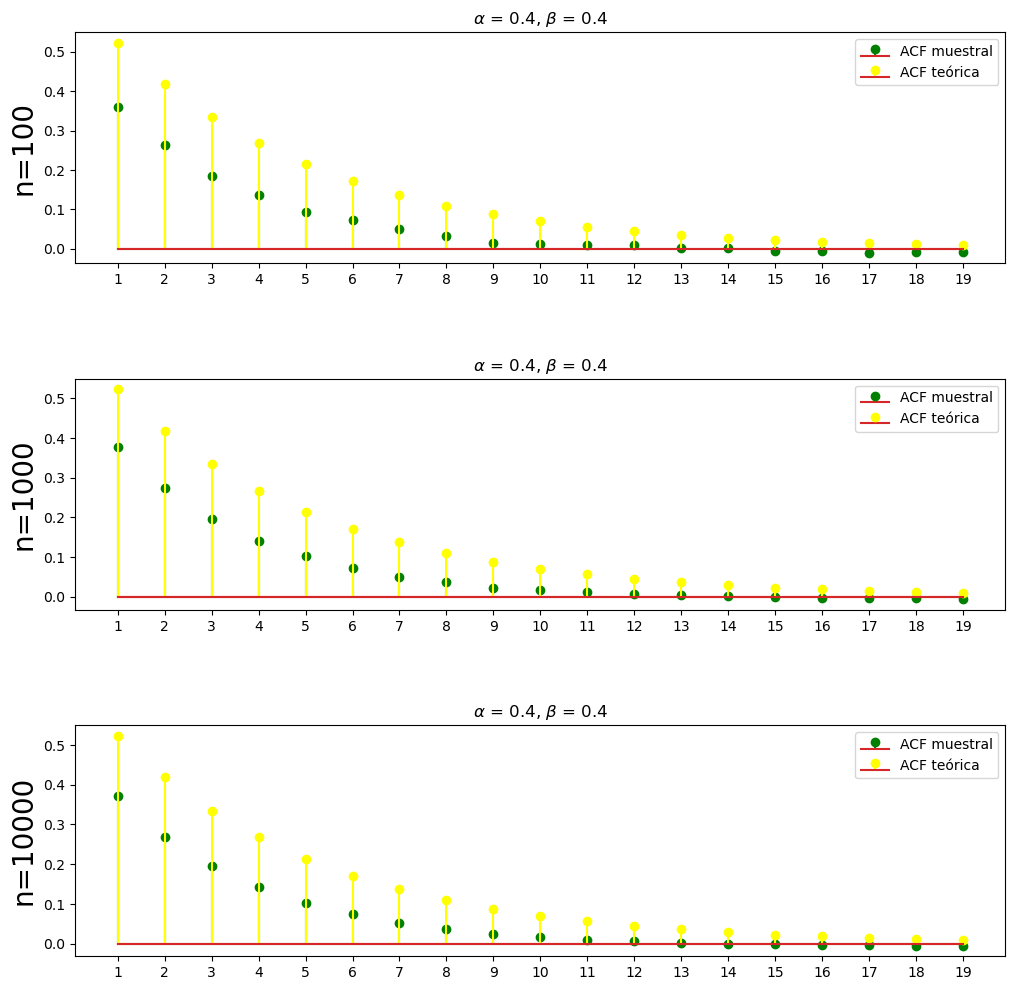

In [57]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf4[i],linefmt='green', label='ACF muestral')
    ax.stem(acf4t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[3]}, $\beta$ = {beta[3]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

# m = 1000 y variando el n

In [60]:
acf1 =[]
acf2 = []
acf3 = []
acf4 = []

acf1t =[]
acf2t = []
acf3t = []
acf4t = []

In [58]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [59]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [61]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [62]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [63]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [64]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [65]:
acf_m = []
acf_t = []
n=10000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [66]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [67]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [68]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen2 = pd.DataFrame(dist,columns = names)
resumen2.index = ["n=100","n=1000","n=10000"]

# graps

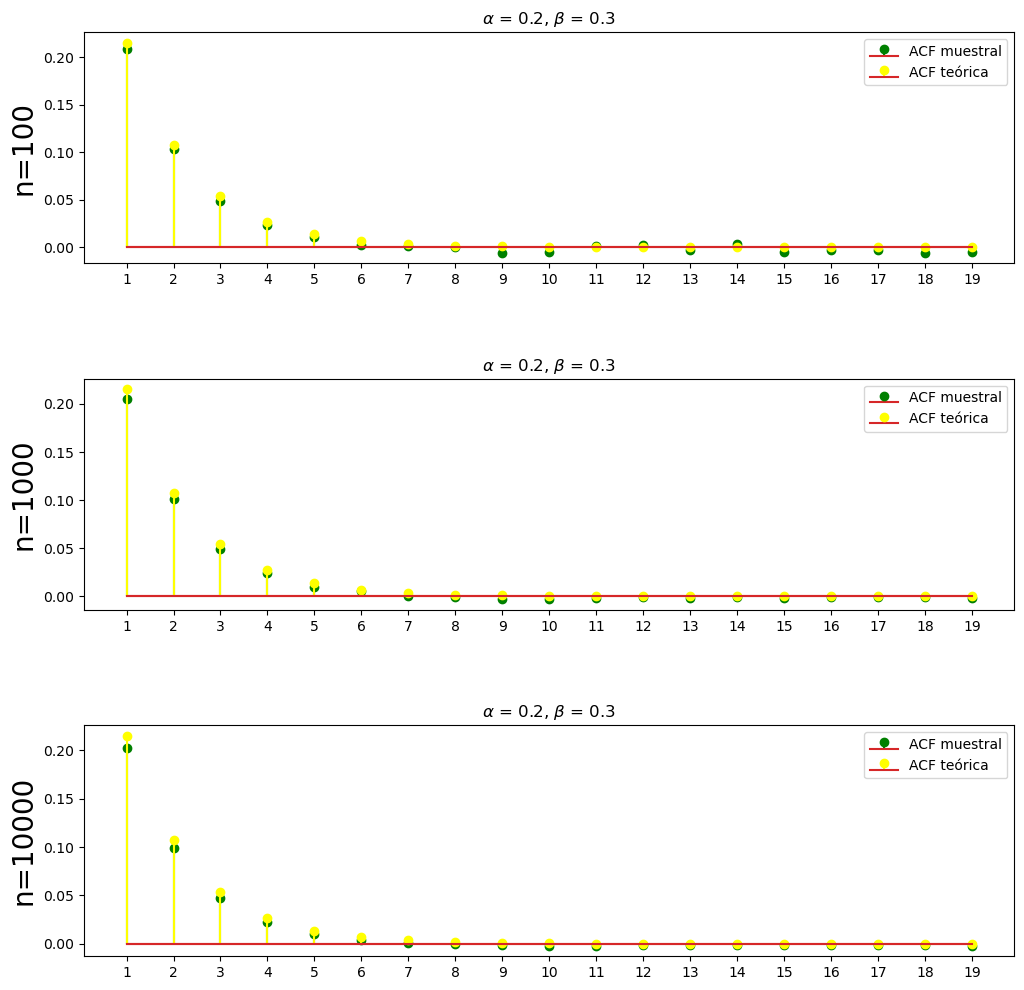

In [69]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf1[i],linefmt='green', label='ACF muestral')
    ax.stem(acf1t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

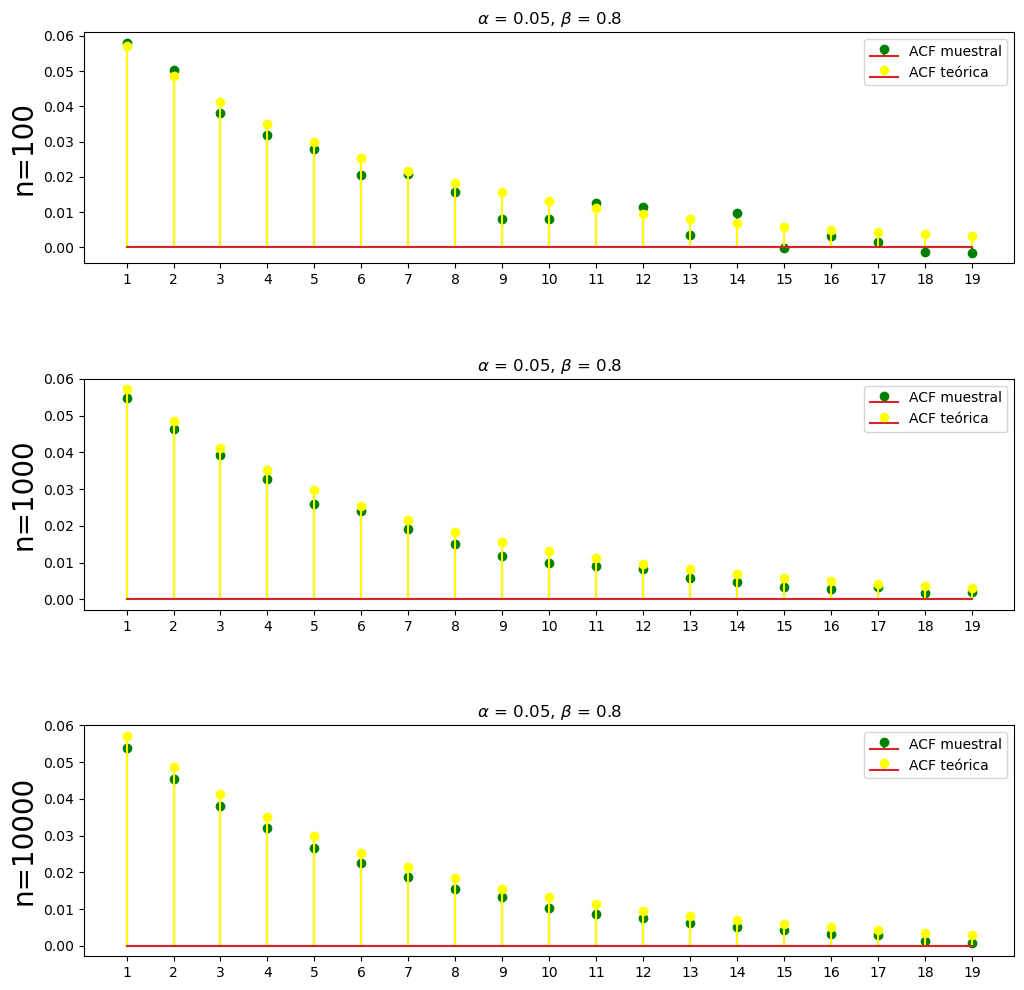

In [70]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf2[i],linefmt='green', label='ACF muestral')
    ax.stem(acf2t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

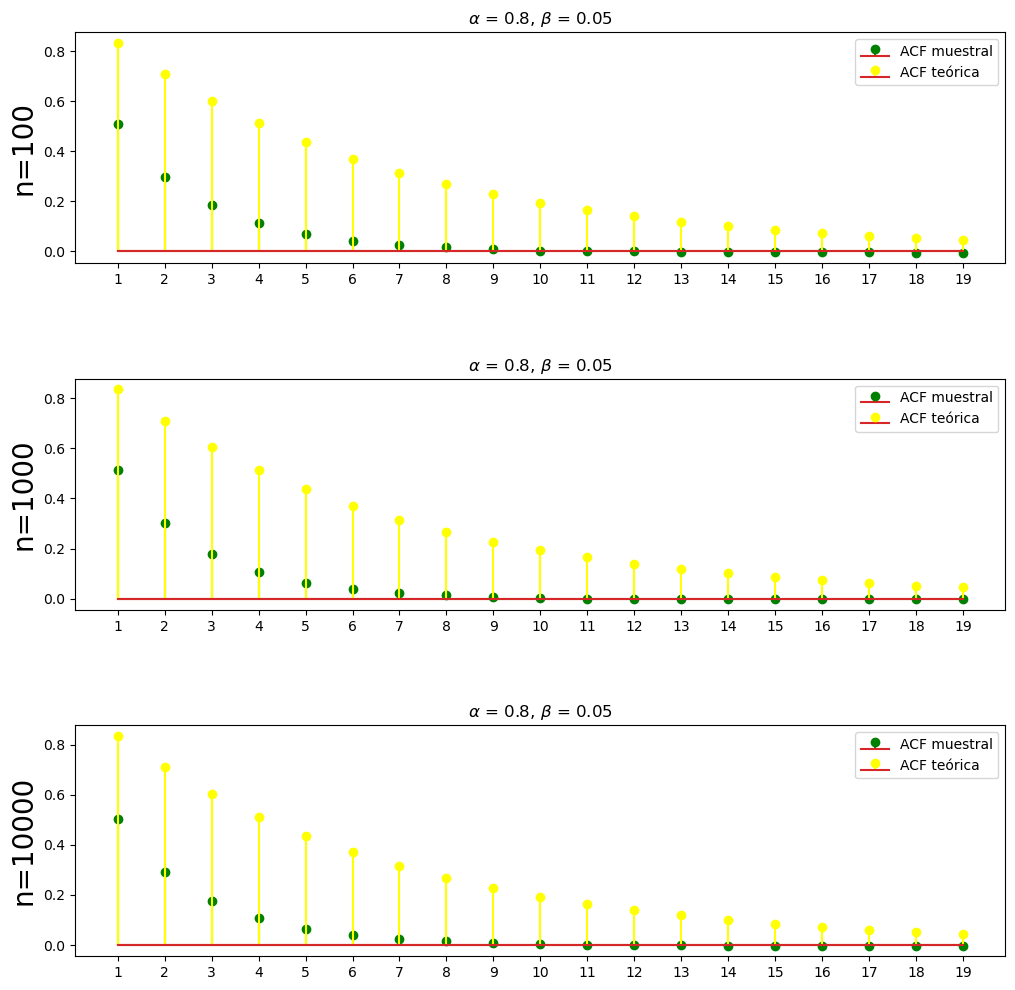

In [71]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf3[i],linefmt='green', label='ACF muestral')
    ax.stem(acf3t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[2]}, $\beta$ = {beta[2]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

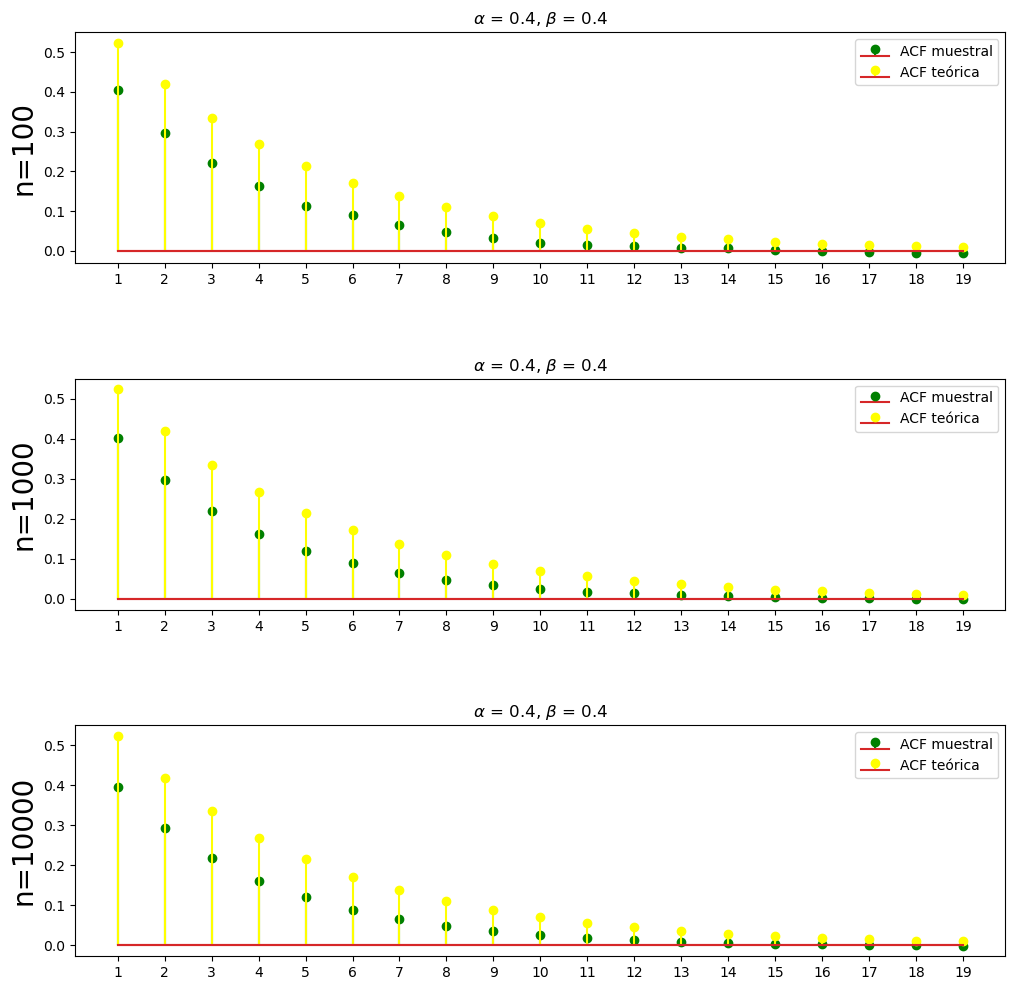

In [72]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf4[i],linefmt='green', label='ACF muestral')
    ax.stem(acf4t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[3]}, $\beta$ = {beta[3]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

## Caso 1000 por 10000 tupla 3 y 4 de parametros

In [93]:
x = np.arange(1,20)
alpha = [0.8,0.4]
beta = [0.05,0.4]
omega = 0.1

In [93]:
acf_m = []
acf_t = []
n=10000
m=1000000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


KeyboardInterrupt


KeyboardInterrupt



In [ ]:
acf1 =[]
acf2 = []


acf1t =[]
acf2t = []


In [ ]:
distancias_acf0 = []
for i in range(len(alpha)):
    distancias_acf0.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [ ]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])


acf1t.append(acf_t[0])
acf2t.append(acf_t[1])


In [ ]:
fig, axes = plt.subplots(1,1, figsize=(6, 6))

plt.subplots_adjust(hspace=0.5) 
i=0

axes.stem(acf1[i],linefmt='green', label='ACF muestral')
axes.stem(acf1t[i],linefmt='yellow', label = "ACF teórica")
axes.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
axes.set_xticks(range(0, 19))
axes.set_xticklabels(x)
axes.set_ylabel(fr'n={nn[i]}', fontsize=20)
axes.legend()


In [ ]:
fig, axes = plt.subplots(1,1, figsize=(6, 6))

plt.subplots_adjust(hspace=0.5) 
i=0

axes.stem(acf2[i],linefmt='green', label='ACF muestral')
axes.stem(acf2t[i],linefmt='yellow', label = "ACF teórica")
axes.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
axes.set_xticks(range(0, 19))
axes.set_xticklabels(x)
axes.set_ylabel(fr'n={nn[i]}', fontsize=20)
axes.legend()
